###Importing Essential modules and libraries:

In [67]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

####Loading Data set and copying it

In [3]:
data=pd.read_csv('/content/loan_approval_dataset.csv')
df=data.copy()

Data Analysis Along with EDA and preprocessing:

In [4]:
df.head(4)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


In [5]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
df.tail(6)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [16]:
df.shape

(4269, 13)

In [19]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [36]:
df.drop('loan_id',axis=1,inplace=True)

In [37]:
lb_en=LabelEncoder()
df.columns = df.columns.str.strip()
df['education']=lb_en.fit_transform(df['education'])
df['self_employed']=lb_en.fit_transform(df['self_employed'])
df['loan_status']=lb_en.fit_transform(df['loan_status'])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


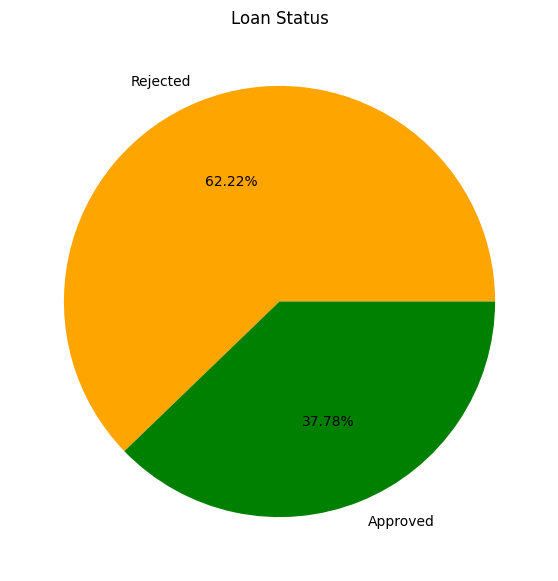

In [38]:
plt.figure(figsize=(7,7))
plt.pie(df['loan_status'].value_counts(),labels=['Rejected','Approved'],autopct='%1.2f%%',colors=['orange','green'])
plt.title('Loan Status')
plt.show()

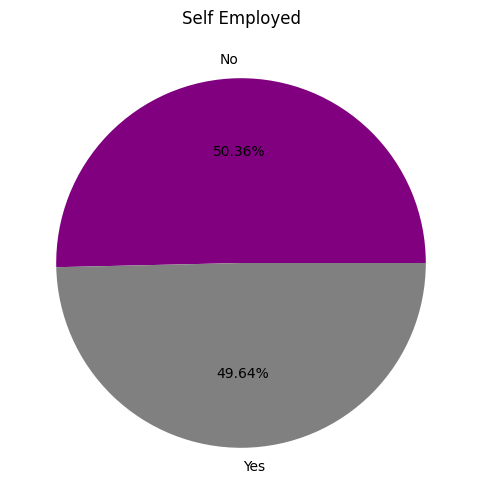

In [39]:
plt.figure(figsize=(6,6))
plt.pie(df['self_employed'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%',colors=['purple','gray'])
plt.title('Self Employed')
plt.show()

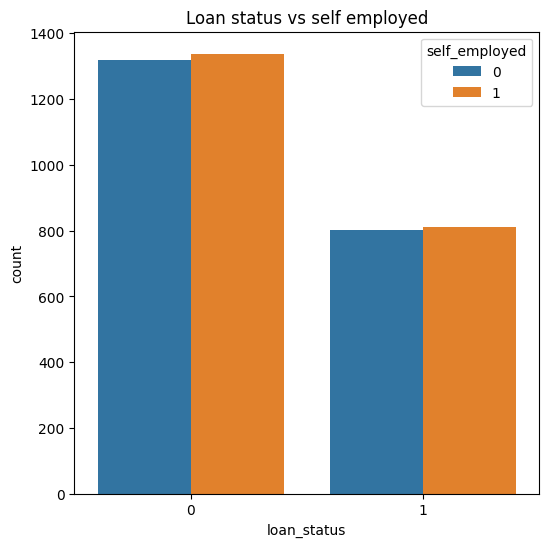

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='loan_status',hue='self_employed')
plt.title('Loan status vs self employed')
plt.show()

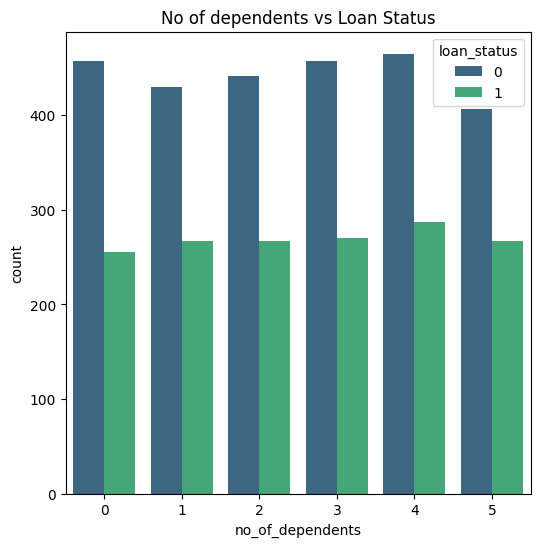

In [45]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='no_of_dependents',hue='loan_status',palette='viridis')
plt.title('No of dependents vs Loan Status')
plt.show()

Feature selection:

In [46]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

Data Splitting:

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=43)

###Model selection

In [90]:
lgModel=LogisticRegression(max_iter=400)
lgModel.fit(X_train,y_train)

LogisticRegression(max_iter=400)

In [91]:
y_predict_lg_train=lgModel.predict(X_train)
y_predict_lg_test=lgModel.predict(X_test)

##Evaluation of Logistic Regression:

In [104]:
print('Train Data ')
print('Accuracy Score: ',accuracy_score(y_train,y_predict_lg_train))
print('Precision: ',precision_score(y_train,y_predict_lg_train))
print('Recall: ',recall_score(y_train,y_predict_lg_train))
print('F1 Score: ',f1_score(y_train,y_predict_lg_train))

Train Data 
Accuracy Score:  0.7950219619326501
Precision:  0.8041237113402062
Recall:  0.6046511627906976
F1 Score:  0.6902654867256637


In [105]:
print('Test Data ')
print('Accuracy score: ',accuracy_score(y_test,y_predict_lg_test))
print('Precision: ',precision_score(y_test,y_predict_lg_test))
print('Recall: ',recall_score(y_test,y_predict_lg_test))
print('F1 score: ',f1_score(y_test,y_predict_lg_test))

Test Data 
Accuracy score:  0.7962529274004684
Precision:  0.8253275109170306
Recall:  0.5851393188854489
F1 score:  0.6847826086956522


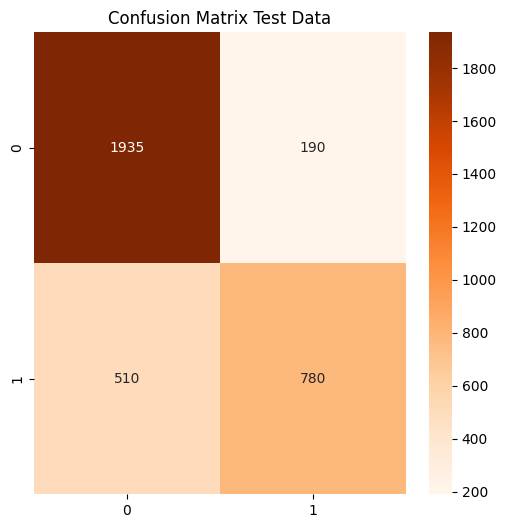

In [101]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train,y_predict_lg_train),annot=True,fmt='d',cmap='Oranges')
plt.title('Confusion Matrix Test Data')
plt.show()

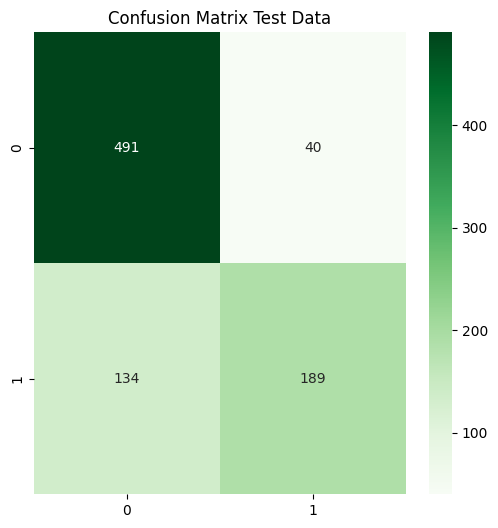

In [98]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_predict_lg_test),annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix Test Data')
plt.show()

Desicion Tree Classifier:


In [108]:
dtModel=DecisionTreeClassifier(max_depth=250)
dtModel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=250)

In [109]:
y_predict_dt_test=dtModel.predict(X_test)
y_predict_dt_train=dtModel.predict(X_train)

Evaluation Of Desicion Tree:

In [110]:
print('Train Data ')
print('Accuracy Score: ',accuracy_score(y_train,y_predict_dt_train))
print('Precision: ',precision_score(y_train,y_predict_dt_train))
print('Recall: ',recall_score(y_train,y_predict_dt_train))
print('F1 Score: ',f1_score(y_train,y_predict_dt_train))

Train Data 
Accuracy Score:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


In [111]:
print('Test Data ')
print('Accuracy Score: ',accuracy_score(y_test,y_predict_dt_test))
print('Precision: ',precision_score(y_test,y_predict_dt_test))
print('Recall: ',recall_score(y_test,y_predict_dt_test))
print('F1 Score: ',f1_score(y_test,y_predict_dt_test))

Test Data 
Accuracy Score:  0.9718969555035128
Precision:  0.96
Recall:  0.9659442724458205
F1 Score:  0.9629629629629629


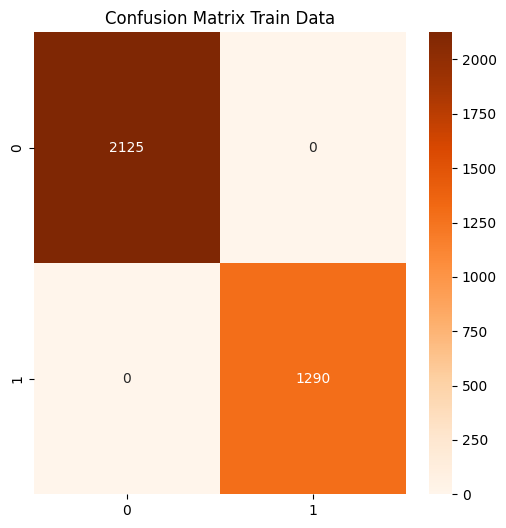

In [115]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_train,y_predict_dt_train),annot=True,fmt='d',cmap='Oranges')
plt.title('Confusion Matrix Train Data')
plt.show()

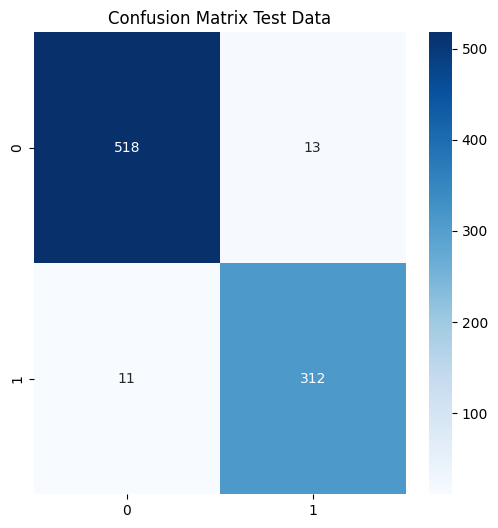

In [114]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_predict_dt_test),annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix Test Data')
plt.show()